In [2]:
import sys
sys.version

import pandas as pd

In [3]:
import gensim
from nltk.util import ngrams
import nltk
import pythainlp

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

from collections import Counter
def get_top_freq_word(series, n):
    all_word = [a for b in series.tolist() for a in b]
    Counter_ = Counter(all_word)
    most_occur = Counter_.most_common(n) 
    return most_occur

def load_dict(file_nm):
    bigram_custom = pd.read_csv(file_nm,header=None,usecols=[0])
    bigram_custom = bigram_custom[0].tolist()
    return bigram_custom

# import

In [4]:
train = pd.read_pickle('../ipynb/tokenized_data/tokenized.pkl')
train.shape

(40000, 2)

try remove food word

In [31]:
# customer food dictionry
custom_dict_wongnai = pd.read_csv('../data/food_dictionary.txt',header=None,names=['word'])
print('custom dict shape : ', custom_dict_wongnai.shape)
custom_dict_wongnai = set(custom_dict_wongnai['word'].tolist())
trie = pythainlp.tokenize.dict_trie(dict_source=custom_dict_wongnai)

custom dict shape :  (409276, 1)


In [35]:
train['remove_food_words'] = train['tokenized'].apply(lambda x: [w for w in x if w not in custom_dict_wongnai])

In [228]:
train['remove_food_words'].sample(1).values

array([list(['ร้าน', 'beirut', 'เบรุต', 'ร้าน', 'อาหาร', 'เลบานอน', 'เจ้าดัง', 'เป็น', 'ชุด', 'นี้', 'ค่ะ', 'มี', 'ไก่', 'ย่าง', 'ฮูมูส', 'และ', 'สลัด', 'ผัก', 'คลุก', 'น้ำมัน', 'มะกอก', 'อีก', 'จาน', 'เป็น', 'ชุด', 'ย่าง', 'รวม', 'มี', 'เนื้อ', 'แกะ', 'ย่าง', 'เนื้อ', 'แกะบด', 'ย่าง', 'และ', 'ไก่', 'ย่าง', 'รสชาติ', 'แบบ', 'เลบานอน', 'ยก', 'นิ้ว', 'ใคร', 'อยาก', 'ลอง', 'ชิม', 'อาหาร', 'เลบานอน', 'อร่อย', 'ต้อง', 'มา', 'ลอง', 'ร้าน', 'นี้', 'เลย', 'ค่ะ'])],
      dtype=object)

In [ ]:
get_top_freq_word(train[''])

bigrams

In [265]:
%%time
# bigram
# input_ = train['tokenized'].tolist()
# bigram = gensim.models.Phrases(input_, min_count=1, threshold=10) # higher threshold fewer phrases.
# bigram_mod = gensim.models.phrases.Phraser(bigram)
# data_words_bigrams = make_bigrams(input_)
# train['bigrams'] = data_words_bigrams

# bigram
train['bigrams'] = train['tokenized'].apply(lambda row: list(nltk.ngrams(row, 2)))
train['bigrams'] = train['bigrams'].apply(lambda row: ['_'.join(gram) for gram in row])

# trigram
# trigram = gensim.models.Phrases(bigram[data_words], threshold=10)
# trigram_mod = gensim.models.phrases.Phraser(trigram)
# data_words_trigrams = make_trigrams(data_words_bigrams)

# trigram
train['trigrams'] = train['tokenized'].apply(lambda row: list(nltk.ngrams(row, 3)))
train['trigrams'] = train['trigrams'].apply(lambda row: ['_'.join(gram) for gram in row])

# quadgram
train['quadgrams'] = train['tokenized'].apply(lambda row: list(nltk.ngrams(row, 4)))
train['quadgrams'] = train['quadgrams'].apply(lambda row: ['_'.join(gram) for gram in row])


CPU times: user 8.9 s, sys: 1.37 s, total: 10.3 s
Wall time: 10.3 s


newmm with customdict [wongnai + topwords]

In [3]:
newmm = pd.read_pickle('newmm_tokenized_with_wongnai_topwords_customdict.pkl')
newmm.shape

(40000, 2)

In [4]:
newmm['tokenized'].sample(1).values

array([list(['after', 'you', 'นี่เป็นร้านที่วัยรุ่นเข้าไปทานกันเยอะสุด', 'ถึงแม้', 'คนจะเยอะ', 'เราก็ไม่หวั่นที่จะเข้ามาทานค่ะ', 'เมนูของอาฟเตอร์ยู', 'มีให้เลือกหลากหลาย', 'นะคะ', 'แต่ละเมนูก็มีความ', 'น่าทาน', 'ทั้งนั้นค่ะ', 'เลือกได้', 'ตามใจชอบ', 'เลยค่ะ', 'ขนมปัง', 'หนา', 'นุ่ม', 'เสิร์ฟมาพร้อมกับ', 'ไอศครีม', 'และ', 'วิฟครีม', 'น่าทาน', 'สุด'])],
      dtype=object)

# from preprocessing

In [4]:
# tok with custom dict [priority topwords, foodwords]
df = pd.read_parquet('../data/train_chunk/result/dc_topword_food_dict/')

In [31]:
df = pd.read_parquet('../data/train_chunk/result/dc_topword_food_dict_remove_single_words_1K')

In [37]:
# output
df = df
data_words = df['tok_remove_topwords'].tolist()

In [7]:
import gensim.corpora as corpora

def get_lda_input(data_words):
    
    # Create Dictionary
    id2word = corpora.Dictionary(data_words)
        
    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in data_words]
    
    return id2word, corpus

# Gensim

In [ ]:
def calculate_coherence( w2v_model, term_rankings ):
    overall_coherence = 0.0
    for topic_index in range(len(term_rankings)):
        # check each pair of terms
        pair_scores = []
        for pair in combinations( term_rankings[topic_index], 2 ):
            pair_scores.append( w2v_model.similarity(pair[0], pair[1]) )
        # get the mean for all pairs in this topic
        topic_score = sum(pair_scores) / len(pair_scores)
        overall_coherence += topic_score
    # get the mean score across all topics
    return overall_coherence / len(term_rankings)

In [76]:
from gensim.models import CoherenceModel

def run_simple_model(list_of_data_words):
    
    for data_words in list_of_data_words:

        id2word, corpus = get_lda_input(data_words)

        # Build LDA model
        lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=10, 
                                               random_state=100,
                                               chunksize=100,
                                               passes=10,
                                               per_word_topics=True)

        # Compute Coherence Score
        coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
        coherence_lda = coherence_model_lda.get_coherence()

        print('\nCoherence Score: ', coherence_lda)

In [78]:
run_simple_model([data_words])

# Sklearn

In [38]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

def dummy(doc):
    return doc

# preprocess

In [40]:
# count vectorizer
tf_vectorizer = CountVectorizer(tokenizer=dummy, preprocessor=dummy)
dtm_tf = tf_vectorizer.fit_transform(data_words)
print(dtm_tf.shape)

tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(data_words)
print(dtm_tfidf.shape)

/home/padpathairush/miniconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


(40000, 122742)


# optimised number of topics

In [81]:
from sklearn.model_selection import KFold
import numpy as np

def kfold_lda_model(dtm, num_top, num_folds):
    
    folds = KFold(n_splits = num_folds, shuffle=True, random_state=543)
    ll_ls = list()
    preplex_ls = list()
    
    for n_fold, (trn_idx, val_idx) in enumerate(folds.split(dtm)):
        
        # extracting train/valid set
        X_train, X_val = dtm[trn_idx], dtm[val_idx]
        
        # fit
        model = LatentDirichletAllocation(n_components=num_top, random_state=0, n_jobs=15)
        model.fit(X_train)
        
        ll_ls.append(model.score(X_val))
        preplex_ls.append(model.perplexity(X_val))
        
        # clear
        del model
        gc.collect()
    
    ll_scr = np.mean(ll_ls)
    preplex_scr = np.mean(preplex_ls)
                
    return ll_scr, preplex_scr

In [82]:
import gc
import time
def optimise_num_toipics(dtm):
    
    # init 
    num_topics = range(1,21)
    res = dict()
    num_top_ls = list()
    ll_ls = list()
    preplex_ls = list()
    
    # process
    for num_top in num_topics:
        
        tik = time.time()
        
        # fit
        ll_scr, preplex_scr = kfold_lda_model(dtm, num_top, num_folds = 5)
        
        # log
        num_top_ls.append(num_top)
        ll_ls.append(ll_scr)
        preplex_ls.append(preplex_scr)
        
        toc = time.time()
        
        # info
        print(f'num_topics {num_top} | process_time {toc - tik:.2f} s | ll_score {ll_scr:,.2f} | preplex_score : {preplex_scr:,.2f}') 

    res['num_topics'] = num_top_ls
    res['log_likelihood_score'] = ll_ls
    res['preplexity_score'] = preplex_ls
    
    return res

In [83]:
score_tfidf_remove_topwords1K = optimise_num_toipics(dtm_tfidf)

num_topics 1 | process_time 27.55 s | ll_score -384,879.65 | preplex_score : 142,825.05
num_topics 2 | process_time 75.46 s | ll_score -402,849.03 | preplex_score : 248,659.63
num_topics 3 | process_time 75.58 s | ll_score -418,689.49 | preplex_score : 405,989.94
num_topics 4 | process_time 67.98 s | ll_score -455,517.74 | preplex_score : 1,261,575.71
num_topics 5 | process_time 66.09 s | ll_score -482,642.60 | preplex_score : 2,915,676.65
num_topics 6 | process_time 65.50 s | ll_score -515,024.04 | preplex_score : 7,906,662.27
num_topics 7 | process_time 68.76 s | ll_score -536,557.14 | preplex_score : 15,368,022.43
num_topics 8 | process_time 68.99 s | ll_score -553,977.04 | preplex_score : 26,503,730.77
num_topics 9 | process_time 70.93 s | ll_score -572,071.81 | preplex_score : 46,770,941.64
num_topics 10 | process_time 73.39 s | ll_score -604,496.83 | preplex_score : 125,263,618.48
num_topics 11 | process_time 74.33 s | ll_score -565,225.93 | preplex_score : 38,457,044.87
num_topi

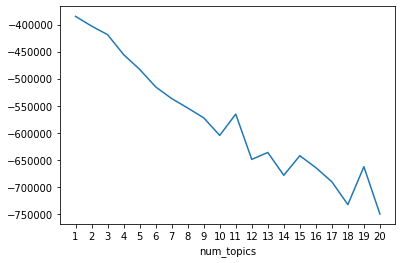

In [102]:
import matplotlib.pyplot as plt
import math

y = [int(c) for c in score_tfidf_remove_topwords1K['num_topics']]
pd.DataFrame(score_tfidf_remove_topwords1K).set_index('num_topics')['log_likelihood_score'].plot();
yint = range(min(y), math.ceil(max(y))+1)
plt.xticks(yint);

**the ll and preplex score from sklearn are obsecure to use due to the behavior**
- the preplex goes up, but it should be goes down when we increase the number of topics
- the ll score seem converting to the ll from the R methods in [define_number_of_topics_with_log_likelihood.pdf]

but for the sake of this times we will select the number_topics that have a turn back > 10

# model

In [108]:
import joblib
def fit_lda_model(dtm, num_topics, file_nm=None):
    
    # fitting
    sel_model = LatentDirichletAllocation(n_components=num_topics, random_state=0, n_jobs=15)
    sel_model.fit(dtm)
    
    # saving
    if file_nm is not None:
        joblib.dump(sel_model, file_nm)
    
    return sel_model

In [109]:
sel_model = fit_lda_model(dtm_tfidf, 10)

# viz

In [110]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [112]:
%%time
pyLDAvis.sklearn.prepare(sel_model, dtm_tfidf, tfidf_vectorizer, n_jobs = 15)

CPU times: user 1min 18s, sys: 656 ms, total: 1min 19s
Wall time: 1min 25s


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.085200  0.012395       1        1  24.506112
4      0.033615 -0.040331       2        1  12.260630
1      0.025468  0.019196       3        1  11.553187
9     -0.002882  0.004781       4        1   8.594930
3     -0.007308  0.004085       5        1   8.027157
0     -0.012835 -0.014757       6        1   7.962287
5     -0.021468  0.009234       7        1   7.277749
8     -0.023695 -0.007217       8        1   6.867780
6     -0.034467  0.030354       9        1   6.631020
2     -0.041627 -0.017740      10        1   6.319150, topic_info=                Term        Freq       Total Category  logprob  loglift
0                     119.000000  119.000000  Default  30.0000  30.0000
122448             ⭐   79.000000   79.000000  Default  29.0000  29.0000
110981           แมว   31.000000   31.000000  Default  28.0000  28.0000
83550          อร่อย  491.000000  491.000000  Default  27.0000  27.0000
18624            ชอบ  527.000000  527.000000  Default  26.0000  26.0000
...              ...         ...         ...      ...      ...      ...
91286    เครื่องดื่ม    6.074986  241.355538  Topic10  -7.4304  -0.9205
15178            ค้า    2.902189   29.229288  Topic10  -8.1691   0.4519
7360          ขนมปัง    4.680426  140.572337  Topic10  -7.6912  -0.6407
26410        ญี่ปุ่น    4.652872  143.290391  Topic10  -7.6971  -0.6658
41455   บรรยากาศร้าน    4.275525  140.114418  Topic10  -7.7817  -0.7280

[833 rows x 6 columns], token_table=        Topic      Freq Term
term                        
0           6  0.998061     
1           1  0.856687   \t
1           2  0.057112   \t
1           3  0.057112   \t
24          1  0.322331    é
...       ...       ...  ...
122445      9  0.067390    ❤
122448      2  0.991729    ⭐
122725      4  0.570835    ５
122736      8  0.754663    ･
122738      8  0.725522    ﾟ

[1442 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 5, 2, 10, 4, 1, 6, 9, 7, 3])

Summary topics (lambda .5 - tfidf) <br>
(1) ภาษาอังกฤษ [ควรเอาออก] <br>
(2) ความคิดเห็นส่วนตัว <br>
(6) ชื่นชม บริการเร็ว อาหารอร่อย <br>
(10) ภาษาอังกฤษ <br>
(13) ด่า

2020-03-23
1. english words should be removed
2. stopwords shoud be removed and refined
3. mmds, tsne are better in visualization than default method

In [113]:
%%time
pyLDAvis.sklearn.prepare(sel_model, dtm_tfidf, tfidf_vectorizer, n_jobs = 15, mds='mmds')

CPU times: user 1min 19s, sys: 719 ms, total: 1min 20s
Wall time: 1min 25s


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.016136 -0.095682       1        1  24.506112
4      0.026201 -0.055905       2        1  12.260630
1     -0.062942 -0.011078       3        1  11.553187
9     -0.012474  0.020614       4        1   8.594930
3      0.037706 -0.014690       5        1   8.027157
0      0.057181  0.011878       6        1   7.962287
5      0.003078  0.060065       7        1   7.277749
8     -0.029723 -0.019917       8        1   6.867780
6     -0.047037  0.050798       9        1   6.631020
2      0.044146  0.053916      10        1   6.319150, topic_info=                Term        Freq       Total Category  logprob  loglift
0                     119.000000  119.000000  Default  30.0000  30.0000
122448             ⭐   79.000000   79.000000  Default  29.0000  29.0000
110981           แมว   31.000000   31.000000  Default  28.0000  28.0000
83550          อร่อย  491.000000  491.000000  Default  27.0000  27.0000
18624            ชอบ  527.000000  527.000000  Default  26.0000  26.0000
...              ...         ...         ...      ...      ...      ...
91286    เครื่องดื่ม    6.074986  241.355538  Topic10  -7.4304  -0.9205
15178            ค้า    2.902189   29.229288  Topic10  -8.1691   0.4519
7360          ขนมปัง    4.680426  140.572337  Topic10  -7.6912  -0.6407
26410        ญี่ปุ่น    4.652872  143.290391  Topic10  -7.6971  -0.6658
41455   บรรยากาศร้าน    4.275525  140.114418  Topic10  -7.7817  -0.7280

[833 rows x 6 columns], token_table=        Topic      Freq Term
term                        
0           6  0.998061     
1           1  0.856687   \t
1           2  0.057112   \t
1           3  0.057112   \t
24          1  0.322331    é
...       ...       ...  ...
122445      9  0.067390    ❤
122448      2  0.991729    ⭐
122725      4  0.570835    ５
122736      8  0.754663    ･
122738      8  0.725522    ﾟ

[1442 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 5, 2, 10, 4, 1, 6, 9, 7, 3])

In [114]:
%%time
pyLDAvis.sklearn.prepare(sel_model, dtm_tfidf, tfidf_vectorizer, n_jobs = 15, mds='tsne')

CPU times: user 1min 22s, sys: 703 ms, total: 1min 23s
Wall time: 1min 25s


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
7      32.420952   8.115230       1        1  24.506112
4       0.648955  71.707100       2        1  12.260630
1      71.019684   9.971006       3        1  11.553187
9       3.785981  33.185135       4        1   8.594930
3     -42.666500  -9.222070       5        1   8.027157
0      -3.621689 -43.526516       6        1   7.962287
5      -3.632402  -4.171708       7        1   7.277749
8     -36.584400  35.804413       8        1   6.867780
6      44.391380  50.615383       9        1   6.631020
2      40.235809 -31.591665      10        1   6.319150, topic_info=                Term        Freq       Total Category  logprob  loglift
0                     119.000000  119.000000  Default  30.0000  30.0000
122448             ⭐   79.000000   79.000000  Default  29.0000  29.0000
110981           แมว   31.000000   31.000000  Default  28.0000  28.0000
83550          อร่อย  491.000000  491.000000  Default  27.0000  27.0000
18624            ชอบ  527.000000  527.000000  Default  26.0000  26.0000
...              ...         ...         ...      ...      ...      ...
91286    เครื่องดื่ม    6.074986  241.355538  Topic10  -7.4304  -0.9205
15178            ค้า    2.902189   29.229288  Topic10  -8.1691   0.4519
7360          ขนมปัง    4.680426  140.572337  Topic10  -7.6912  -0.6407
26410        ญี่ปุ่น    4.652872  143.290391  Topic10  -7.6971  -0.6658
41455   บรรยากาศร้าน    4.275525  140.114418  Topic10  -7.7817  -0.7280

[833 rows x 6 columns], token_table=        Topic      Freq Term
term                        
0           6  0.998061     
1           1  0.856687   \t
1           2  0.057112   \t
1           3  0.057112   \t
24          1  0.322331    é
...       ...       ...  ...
122445      9  0.067390    ❤
122448      2  0.991729    ⭐
122725      4  0.570835    ５
122736      8  0.754663    ･
122738      8  0.725522    ﾟ

[1442 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 5, 2, 10, 4, 1, 6, 9, 7, 3])

topics (total 20)

2 - ก๊วยเตี๊ยว <br>
3 - เค้ก/กาแฟ/ขนมหวาน <br>
4 - อาหารญี่ปุ่น <br>
5 - เวียดนาม <br>
6 - emoticon ⭐ ♡ <br>
7 - ซูชิ <br>
8 - ไม่อร่อยเหมือนเดิม / ยังดีอยู่ <br>
10, 18 - local food <br>
14 - ร้านบรรยากาศดี / ราคาไม่แพง / ทุกอย่างอร่อยหมด <br>
19 - ต่างจังหวัด <br>

# score

In [277]:
best_lda_model = sel_model
data_vectorized = dtm_tfidf

# credit : https://medium.com/@yanlinc/how-to-build-a-lda-topic-model-using-from-text-601cdcbfd3a6

# Create Document — Topic Matrix
lda_output = best_lda_model.transform(data_vectorized)

# column names
topicnames = ["Topic" + str(i) for i in range(1, best_lda_model.n_components + 1)]

# index names
docnames = ["Doc" + str(i) for i in range(data_vectorized.shape[0])]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic + 1

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)
def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,dominant_topic
Doc0,0.020000,0.020000,0.020000,0.020000,0.830000,0.020000,0.020000,0.020000,0.020000,0.020000,5
Doc1,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.820000,0.020000,0.020000,0.020000,7
Doc2,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.280000,0.620000,0.010000,9
Doc3,0.020000,0.170000,0.020000,0.020000,0.020000,0.020000,0.020000,0.680000,0.020000,0.020000,8
Doc4,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.750000,0.030000,9
Doc5,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.800000,0.020000,0.020000,0.020000,7
Doc6,0.020000,0.020000,0.020000,0.480000,0.020000,0.020000,0.020000,0.370000,0.020000,0.020000,4
Doc7,0.020000,0.800000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,2
Doc8,0.020000,0.830000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,2
Doc9,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.800000,10


In [283]:
topic_cols = [c for c in df_document_topic.columns if c.startswith('Topic')]
topic_cols

bool_df = (df_document_topic.loc[:,topic_cols] > 0.1).astype(int).reset_index(drop=True)

build_topic_df_dict = dict()
for i, topic in enumerate(topic_cols,1):
    build_topic_df_dict[topic] = [i]
topic_df = pd.DataFrame(build_topic_df_dict)
topic_df = pd.concat([topic_df]*df_document_topic.shape[0])

In [346]:
map_topics = {
    0 + 1 : "variety / seafood / don't miss",
    1 + 1 : "none",
    2 + 1 : "nice / foreign",
    3 + 1 : "none",
    4 + 1 : "dessert",
    5 + 1 : "cheap / take-away",
    6 + 1 : "quantity",
    7 + 1 : "service, band",
    8 + 1 : "local / cheap",
    9 + 1 : "location / excellence / local / service mind"
}

In [347]:
res = np.multiply(bool_df, topic_df)
res = res.replace(map_topics)
res['topics'] = res.values.tolist()
res['topics'] = res['topics'].apply(lambda x : [t for t in x if t != 0])

In [348]:
topics_nm = res['topics']

# to clean

In [123]:
vectorizer = tfidf_vectorizer

# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

# View
df_topic_keywords.sort_values()

,,\t,,{,},£,¤,¥,¦,«,...,＾,＿,｀,｡,･,ｰ,ﾟ,ﾠ,￣,￼
Topic0,239.1,0.111784,0.145576,0.100000,0.100000,0.100000,0.100000,1.208544,0.1,0.658629,...,0.1,0.100000,0.100000,0.100000,0.100000,0.1,0.100000,0.1,0.1,0.100410
Topic1,0.1,0.870636,0.100437,0.100012,0.100012,0.100000,0.319194,1.408323,0.1,0.100000,...,0.1,0.100000,0.100183,0.100000,0.100000,0.1,0.100000,0.1,0.1,0.100000
Topic2,0.1,0.100001,0.100000,0.100000,0.100000,0.378149,0.100000,0.100000,0.1,0.438933,...,0.1,0.100000,0.100000,0.465692,0.306608,0.1,0.503724,0.1,0.1,0.100009
Topic3,0.1,0.844675,0.100000,0.100000,0.100000,0.100000,0.100000,1.082655,0.1,0.100000,...,0.1,0.247415,0.268756,0.100000,0.100000,0.1,0.100000,0.1,0.1,0.100000
Topic4,0.1,1.745451,0.100000,0.100000,0.100000,0.663482,0.100000,2.080626,0.1,0.100029,...,0.1,0.100000,0.100000,0.319783,0.216983,0.1,0.100000,0.1,0.1,0.100000


In [145]:
to_remove = ['', '\t', '\x0b', '{', '}', '£', '¤', '¥', '¦', '«', '°', '´', '·',
'º', '»', '¼', '¿', '×', 'à', 'á', 'â', 'ä', 'ç', 'è', 'é', 'ê',
'í', 'î', 'ñ', 'ó', 'ô', 'ö', 'û', 'č', 'ť', 'ơ', 'ʔ', 'ʕ', 'ˇ',
'ˍ', '̀', '́', '̫', 'ε', 'ο', 'σ', 'ω', 'д', '構', '樓', '歡', '段', '気', '水', '沢', '泰', '海', '添', '港', '湯', '準',
'滷', '然', '焼', '特', '用', '番', '異', '的', '県', '私', '穩', '第', '終',
'経', '結', '美', '老', '而', '肉', '苗', '菜', '華', '蕘', '薁', '街', '貢',
'身', '运', '近', '道', '鄉', '酒', '野', '開', '阪', '附', '雖', '雰', '題',
'顧', '食', '飯', '香', '鮪', '낙', '볶', '음', '지', '\ue404', '\uf020',
'\uf04a', '\uf04c', '\uf701', '\uf701วชั่น', '\uf705ากวางเมนู',
'\uf705ุนต', '\uf70a', '\uf70aง', '\uf70aงจาน', '\uf70aงหรรษา',
'\uf70aงได\uf70b', '\uf70aนขาหมู', '\uf70aนชิลท่ีทาง',
'\uf70aนเฟรนฟราย', '\uf70aบเนื้อโค', '\uf70aบและ', '\uf70aว',
'\uf70aา', '\uf70aาง', '\uf70aางเน้ือโคขุนเมนูเป',
'\uf70aางเฟรนฟราย', '\uf70aาน', '\uf70aานได', '\uf70aาย',
'\uf70aายเนื้อโค', '\uf70aาเป\uf712นร', '\uf70aาเมนูปลา',
'\uf70aูอบชสีก', '\uf70b', '\uf70bง', '\uf70bงแท', '\uf70bมแซ',
'\uf70bวกลับ', '\uf70bวก็', '\uf70bวยหอมเมนู', '\uf70bวไม',
'\uf70bา', '\uf70bาน', '\uf70bานเมนูตํา', '\uf70bานแต',
'\uf70bารับรอง', '\uf70bาว', '\uf70bาฯลฯ', '\uf70bาได',
'\uf70bุงเริง', '\uf70bูสึก', '\uf70cกคอหมู', '\uf70cกไม',
'\uf70d', '\uf70e', '\uf70eมแอนด\uf70eเรสเตอร', '\uf712',
'\uf712ด', '\uf712ดร', '\uf712ดไก', '\uf712น', '\uf712นตัว',
'\uf712นอีก', '\uf712นเน้ือโคขุนกวางอกเป', '\uf714', '︽', '﹋', '﹌',
'﹏', '！', '％', '（', '）', '，', '／', '５', '：', '；', '＜', '＞', '？',
'＠', '＾', '＿', '｀', '｡', '･', 'ｰ', 'ﾟ', 'ﾠ', '￣', '￼','ら', 'り', 'る', 'れ', 'を', 'ん', '゜', 'ゝ', 'ゞ', 'ア', 'イ', 'ク', 'サ',
'ス', 'タ', 'チ', 'ッ', 'ツ', 'ニ', 'ノ', 'バ', 'ビ', 'フ', 'ブ', 'ベ', 'メ',
'ュ', 'ョ', 'ラ', 'リ', 'ル', 'ヮ', 'ン', 'ー', 'ヽ', 'ヾ', 'ㅠ', '一', '不',
'且', '中', '丸', '丼', '也', '人', '但', '住', '供', '們', '値', '偏', '元',
'光', '共', '内', '刺', '南', '去', '友', '台', '号', '司', '味', '和', '咸',
'品', '唯', '商', '喜', '囲', '國', '在', '壱', '多', '大', '天', '太', '好',
'定', '寿', '屋', '山', '常', '年', '庄', '店', '廣', '很', '得', '意', '房',
'提', '放', '方', '日', '有', '朋', '本', '東', '栗',  '…', '\u2028', '\u202a', '\u202c', '′', '″', '‼',
'₩', '€', '⃣', '℅', '←', '→', '↓', '↖', '∀', '∂', '∇', '√', '∩',
'≦', '≧', '⊙', '⌂', '⌒', '⌓', '⌛', '⏭', '⏰น', '⏳', '␥', '①', '②',
'╯', '╰', '╹', '■', '■ใช้มะนาวสด', '□', '▪', '▫', '▲', '▶', '▼',
'▽', '◀', '◆', '◇', '◉', '○', '◎', '●', '●ไลน์ขนมหวาน',
'●ไลน์ซูชิ', '◕ฺ', '◡', '☀', '☄', '★', '☎', '☕', '☘', '☝', '☺',
'♂', '♉', '♟', '♢', '♣', '♤', '♥', '♧', '♨', '♫', '⚓', '⚠', '⚡',
'⛄', '⛅', '⛤', '⛧', '⛱', '⛳', '⛵', '⛺', '✅', '✈', '✋', '✌', '✍',
'✏', '✔', '✖', '✨', '✩', '✮', '✳', '❀', '❂', '❄', '❌', '❎', '❓',
'❔', '❕', '❗', '❣', '❤', '➡', '➰', '⭐', '⭕', '\u3000', '、', '。',
'《', '》', '「', '」', '〜', '〰', 'あ', 'い', 'う', 'お', 'か', 'が', 'き',
'く', 'こ', 'さ', 'し', 'す', 'そ', 'た', 'だ', 'ち', 'っ', 'つ', 'て', 'で',
'と', 'ど', 'な', 'に', 'の', 'は', 'ぶ', 'べ', 'ほ', 'ま', 'み', 'も', 'ゃ']

# get topics nm by distinct keywords from top_n

In [190]:
# Show top n keywords for each topic
def show_topics(vectorizer, lda_model, strt_n_words=0, end_n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in sel_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[strt_n_words:end_n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, strt_n_words=0, end_n_words=50)

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['word_'+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['topic_'+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords = df_topic_keywords.transpose()

for i in range(df_topic_keywords.shape[1]):
    main_ = set(df_topic_keywords.iloc[:,i].tolist())
    subtract = set()
    for j in range(df_topic_keywords.shape[1]):
        if j != i:
            subtract_ = set(df_topic_keywords.iloc[:,j].tolist())
            subtract = subtract.union(subtract_)
            
    print(i, main_.difference(subtract))

0 {'', 'หอมมาก', 'อาหารทะเลสด', 'อาหารหลากหลาย', 'ร', 'อาหารใต้', 'โดนัท', 'ไม่ควรพลาด', 'เพียบ'}
1 {'ูม', 'ลอดช่อง', 'ยุค', 'เพื่อนฝูง', 'น้องแมว', 'แมว', 'หาที่จอดรถ', '✨', 'ข้าวหมูแดง', 'แม่ค้า'}
2 {'แซบ', 'วิวสวย', 'ถือว่าใช้ได้', 'ปรากฎ', 'ค้า', 'ต้มแซ่บ', 'มันกุ้ง', 'อด', 'สยาม', 'วน', 'ดับ', 'ชาวต่างชาติ'}
3 {'สั่งเมนู', 'แก', 'ล้าง', 'สู้', 'แลก', 'ต้มยำกุ้ง', 'ตบท้าย', 'ตับ', 'ยย', 'สวัสดี'}
4 {'สตรอเบอรี่', 'ต้องมาลอง', 'แพนเค้ก', 'ชีสเค้ก', 'ต้องรอคิว', 'ขนมปังปิ้ง', '⭐'}
5 {'จัง', '❤', 'สั่งกลับบ้าน', 'ราคาไม่แพงมาก', 'ช้อน', 'พึ่ง', 'พระราม', 'เผ็ดมาก', 'หาด'}
6 {'ขั้น', 'ปอเปี๊ย', 'อาหารจานเด็ด', 'หม้อไฟ', 'คู่แข่ง', 'ชนะ', 'อาหารเยอะมาก', 'ก๋วยเตี๋ยวต้มยำ', 'หัวข้อ', 'วิจารณ์', 'เดี๋ยวนี้', 'ะ', 'หมายเหตุ', 'เป็นความเห็น', 'เอาใจช่วย'}
7 {'ไวน์', 'ปลาดิบ', 'แบรนด์', 'การบริการดี', 'ของคาว', 'โซฟา', 'ยุง', 'ข้าวหน้า', 'วาฟเฟิล', 'โทน'}
8 {'ราดข้าว', 'ราคาก็ไม่แพง', 'อาหารคาว', 'ศึกษา', 'ผัดไทย', 'หอยทอด', 'หมูตุ๋น', 'เปิดมานาน', 'โบราณ', 'ร้านประจำ'}
9 {'บรรยากาศในร้าน', 

###### top distinct word in top 50
    0 {'', 'หอมมาก', 'อาหารทะเลสด', 'อาหารหลากหลาย', 'ร', 'อาหารใต้', 'โดนัท', 'ไม่ควรพลาด', 'เพียบ'}
    1 {'ูม', 'ลอดช่อง', 'ยุค', 'เพื่อนฝูง', 'น้องแมว', 'แมว', 'หาที่จอดรถ', '✨', 'ข้าวหมูแดง', 'แม่ค้า'}
    2 {'แซบ', 'วิวสวย', 'ถือว่าใช้ได้', 'ปรากฎ', 'ค้า', 'ต้มแซ่บ', 'มันกุ้ง', 'อด', 'สยาม', 'วน', 'ดับ', 'ชาวต่างชาติ'}
    3 {'สั่งเมนู', 'แก', 'ล้าง', 'สู้', 'แลก', 'ต้มยำกุ้ง', 'ตบท้าย', 'ตับ', 'ยย', 'สวัสดี'}
    4 {'สตรอเบอรี่', 'ต้องมาลอง', 'แพนเค้ก', 'ชีสเค้ก', 'ต้องรอคิว', 'ขนมปังปิ้ง', '⭐'}
    5 {'จัง', '❤', 'สั่งกลับบ้าน', 'ราคาไม่แพงมาก', 'ช้อน', 'พึ่ง', 'พระราม', 'เผ็ดมาก', 'หาด'}
    6 {'ขั้น', 'ปอเปี๊ย', 'อาหารจานเด็ด', 'หม้อไฟ', 'คู่แข่ง', 'ชนะ', 'อาหารเยอะมาก', 'ก๋วยเตี๋ยวต้มยำ', 'หัวข้อ', 'วิจารณ์', 'เดี๋ยวนี้', 'ะ', 'หมายเหตุ', 'เป็นความเห็น', 'เอาใจช่วย'}
    7 {'ไวน์', 'ปลาดิบ', 'แบรนด์', 'การบริการดี', 'ของคาว', 'โซฟา', 'ยุง', 'ข้าวหน้า', 'วาฟเฟิล', 'โทน'}
    8 {'ราดข้าว', 'ราคาก็ไม่แพง', 'อาหารคาว', 'ศึกษา', 'ผัดไทย', 'หอยทอด', 'หมูตุ๋น', 'เปิดมานาน', 'โบราณ', 'ร้านประจำ'}
    9 {'บรรยากาศในร้าน', 'อัธยาศัย', 'เข็น', 'เลิศ', 'ปาท่องโก๋', 'ตกใจ', 'ชาเย็น', 'รสเด็ด', 'ถึงแม้', 'ไข่กระทะ', 'ไข่เจี'}

###### grouping
    0 variety / seafood / don't miss
    1 none
    2 nice / foreign 
    3 none
    4 dessert
    5 cheap / take-away
    6 quantity
    7 service, band
    8 local / cheap
    9 location / excellence / local / service mind

In [349]:
res = pd.concat([df, topics_nm],axis=1)

In [350]:
pd.options.display.max_colwidth = 1000

In [367]:
res[['review','topics']].sample(5)

,review,topics
19266,ขอบรรยายบรรยากาศร้านก่อนนะงับ วิวดี ทำเลดี ร้านสะอาด โต้ะสีขาวน่านั่ง สไตลวินเทจ หน่อย มีพวงหอยโมบายเปลือกหอยระย้าตามแต่ละโต้ะ มาต่อด้วยเรื่องอาหาร วันนี้เราสั่งปลากะพงทอดน้ำปลา[ บาท] มีซีอิ้วหวาน กับยำมะม่วงมาให้ด้วย หอยเชลล์อบเนยทอดกระเทียม[ ] เมนูแนะนำ แอบเหนียวไปนิด แต่ไม่คาวเลย รสชาติดีที่สุดในโลก ทะเลผัดฉ่า[ ] รสชาติธรรมดา แต่เครื่องคาวหวานสดดี ปูนิ่มผัดผงกะหรี่[ ] หอมกะหรี่มากจ้า รสชาติล้ำไปหลายโลก อร่อย แนะนำต้องสั่ง กุ้งแช่น้ำปลา[ บาท] ตัวใหญ่ เนื้อเด้งหวาน เค็ม น้ำจิ้มอร่อยมากกก แซ่บ เผ็ด ถึงใจ เหมาะทานกับค็อกเทลมั่ก ข้าวผัดปู เนื้อปูเยอะกว่าข้าวอีกฮะ ร้านนี้แม้แต่พริกน้ำปลายังอร่อยอะคิดดู อวยสุด อวยขนาดนี้ละ ไปกินเถอะ มาเกาะ ต้องมาร้านนี้ซักครั้ง รับรอง ติดลิ้น ติดปาก ติดใจ ติดไปหลายวัน,[dessert]
15351,ป้าอ่อน กอกก๊วน อยู่แถว ศาลเจ้า รสชาติถือว่าดีพอควรเลยครับ ถ้าสั่งกับข้าวเป็นจานจะจานละ ขึ้นไป ถ้าสั่งเป็นตามสั่งราดข้าวก็อีกราคานึงครับ ผมสั่งหอยเชลล์ผัดฉ่า นึกว่าจะมาไม่กี่ตัว ที่ไหนได้ มาแบบเยอะมาก กั้งผัดพริกเผา ตามเดิมครับ ให้กั้งปริมาณมาก สรุปนะครับ ความคุ้มค่าต่อราคา รสชาคิ ความสะอาด,"[service, band]"
38859,ร้านอยู่ซอยหัวหิน เปิดทุกวัน ที่นั่งมีทั้งด้านนอกและด้านในที่เป็นห้องแอร์ ในร้านห้องแอร์ ค่อนข้างเล็ก มีที่นั่งแค่ โต้ะ ฟรีไวไฟ เค้กมีให้เลือกน้อยมากตอนมา มีอย่างเดียว เครื่องดื่มราคาประมาณ กว่า ร้านอยู่ติดถนน รสชาติอาหารกลาง ไม่ดีไม่แย่,[location / excellence / local / service mind]
16171,คุกกี้อร่อยชากาแฟร้านเล็ก อยู่ในโรงพยาบาลสวนปุ้งมาทำธุระที่นี่แวะร้านเดิมเนื่องจากติดใจข้าวที่แล้วมากินชาไปรสชาติถูกใจวันนี้ซื้อขนมเพิ่มด้วยเป็นคุกกี้ธัญพืชมีหลากหลายให้เลือกเป็นขนมปังและขนมผสมธัญพืชต่าง ให้เลือกรับประทานกินกับชากาแฟคับ,[none]
35568,ร้านอยุ่ในซอยยิงเป้า นครปฐมครับ บรรยากาศร้านชิว นั่งกันแบบสงบเงียบ เมนูอร่อยคือ ข้าวไข่ข้นแฮม แต่พอดีแฮมหมดครับ เลยได้ข้าวไข่ข้นใส่ไส้กรอกรมควันมาแทนอ่ะ แต่ก้ออร่อยไปอีกแบบนะครับ สนใจเข้ามาทานกันได้ครับ,[none]


In [359]:
pd.concat([res['topics'].value_counts().to_frame('cnt'), res['topics'].value_counts(normalize=True).to_frame('pct') * 100], axis=1).head(15)

,cnt,pct
[none],6488,16.2200
"[service, band]",5873,14.6825
[dessert],4219,10.5475
[location / excellence / local / service mind],2816,7.0400
[variety / seafood / don't miss],2623,6.5575
[cheap / take-away],2135,5.3375
[local / cheap],1928,4.8200
[quantity],1783,4.4575
[nice / foreign],1648,4.1200
"[none, service, band]",1467,3.6675


# Evaluate score

In [ ]:
def compute_coherence_values(texts, corpus, id2word, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

fit optimized model

In [26]:
import mlflow
import warnings
warnings.filterwarnings(action='ignore',category=FutureWarning)
warnings.filterwarnings(action='ignore',category=DeprecationWarning)

try:
    mlflow.create_experiment(name='lda_development')
except:
    expr = mlflow.get_experiment_by_name('lda_development')